In [104]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Question 4.1

In [96]:
a = nx.Graph()
a.add_nodes_from(list(range(1,8)))
a.add_edges_from([
    (1, 2),
    (2, 3),
    (2, 4),
    (3, 5),
    (5, 6),
    (6, 7),
    (7, 4)
])

b = nx.Graph()
b.add_nodes_from(list(range(1,8)))
b.add_edges_from([
    (1, 2),
    (2, 3),
    (2, 4),
    (3, 5),
    (5, 6),
    (6, 7)
])

a_adj = nx.to_numpy_array(a)
b_adj = nx.to_numpy_array(b)

a_x = np.ones((7, ))
b_x = np.ones((7, ))

watch_node_idx = 0
iter=0
while(a_x[watch_node_idx] == b_x[watch_node_idx]):
    a_x = a_x + np.sum(a_adj * a_x, axis=1)
    b_x = b_x + np.sum(b_adj * b_x, axis=1)
    iter += 1
print(f'First difference between red node of graph a, b happend in iteration: {iter}')

First difference between red node of graph a, b happend in iteration: 3


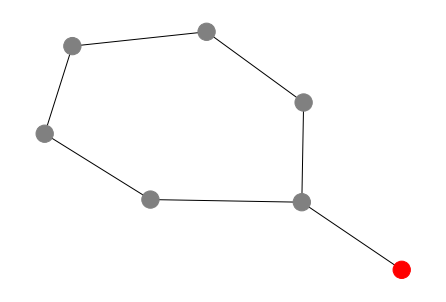

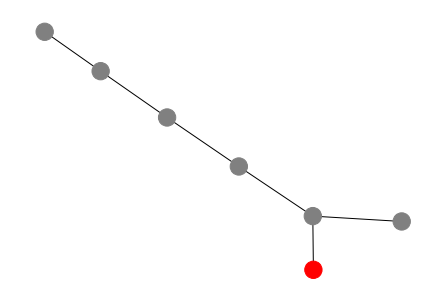

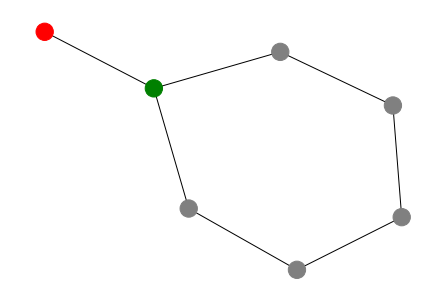

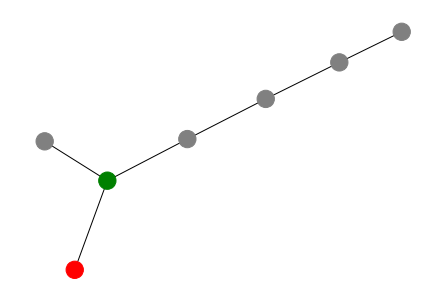

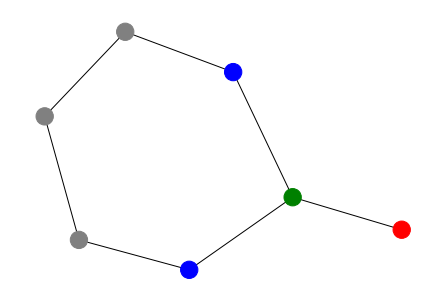

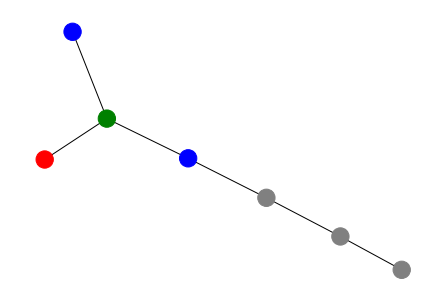

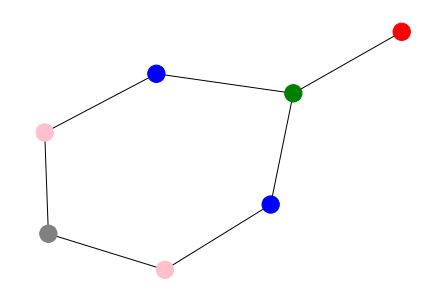

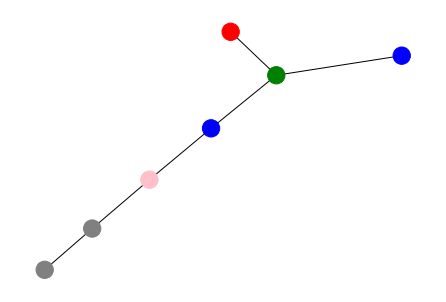

<Figure size 432x288 with 0 Axes>

In [111]:
colors = ['red', 'grey','grey','grey','grey','grey','grey']
nx.draw(a, node_color=colors)
plt.show()
plt.clf()
nx.draw(b, node_color=colors)
plt.show()
plt.clf()

colors = ['red', 'green','grey','grey','grey','grey','grey']
nx.draw(a, node_color=colors)
plt.show()
plt.clf()
nx.draw(b, node_color=colors)
plt.show()
plt.clf()

colors = ['red', 'green','blue','blue','grey','grey','grey']
nx.draw(a, node_color=colors)
plt.show()
plt.clf()
nx.draw(b, node_color=colors)
plt.show()
plt.clf()

colors = ['red', 'green','blue','blue','pink','grey','pink']
nx.draw(a, node_color=colors)
plt.show()
plt.clf()
colors = ['red', 'green','blue','blue','pink','grey','grey']
nx.draw(b, node_color=colors)
plt.show()
plt.clf()


## Question 4.2

In [160]:
A = np.array([
    [0, 1, 0, 1],
    [1, 0, 0, 1],
    [0, 0, 0, 1],
    [1, 1, 1, 0]
])
M = A / np.sum(A, axis=0)
r = np.array([0, 0, 1, 0])
M@r

array([0., 0., 0., 1.])

In [159]:
evals, evecs = np.linalg.eig(M)
print(np.round(evals, 5))
np.round(evecs[:, np.where(np.round(evals, 5) == 1)[0]], 2)

[ 1.       0.22871 -0.5     -0.72871]


array([[0.47],
       [0.47],
       [0.24],
       [0.71]])

## Question 4.3 and 4.4

In [191]:
D = np.eye(4) * np.sum(A, axis=1)
A @ np.linalg.inv(D)

array([[0.        , 0.5       , 0.        , 0.33333333],
       [0.5       , 0.        , 0.        , 0.33333333],
       [0.        , 0.        , 0.        , 0.33333333],
       [0.5       , 0.5       , 1.        , 0.        ]])

In [192]:
1/2*(A @ np.linalg.inv(D)) + 1/2*np.eye(4)

array([[0.5       , 0.25      , 0.        , 0.16666667],
       [0.25      , 0.5       , 0.        , 0.16666667],
       [0.        , 0.        , 0.5       , 0.16666667],
       [0.25      , 0.25      , 0.5       , 0.5       ]])

## Question 4.6

(array([1, 0, 0, 0]),
 array([[0, 1, 0, 1],
        [1, 0, 0, 1],
        [0, 0, 0, 1],
        [1, 1, 1, 0]]),
 None)

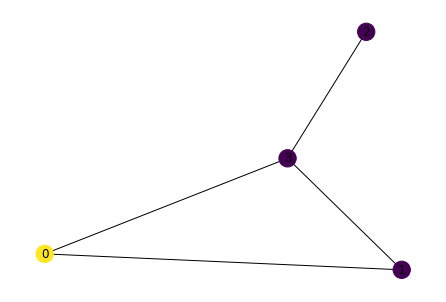

In [280]:
BFS = np.zeros((4, )).astype('int')
BFS[0] = 1
BFS, A, nx.draw(nx.from_numpy_array(A),with_labels=True, node_color=BFS)

(array([1, 1, 0, 1]), None)

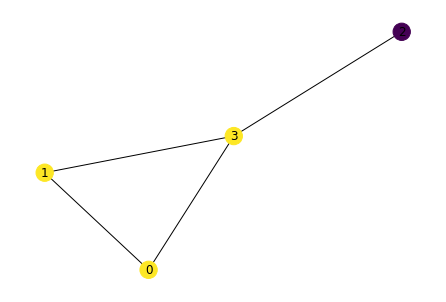

In [281]:
#One Step - Run Several times for Several Steps
BFS = np.logical_or(BFS, np.any((A * BFS), axis=1)).astype('int')
BFS, nx.draw(nx.from_numpy_array(A),with_labels=True, node_color=BFS)